In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import inf

In [2]:
def MSE(block1, block2):
    return np.sum((block1.astype("float") - block2.astype("float")) ** 2) / float(block1.shape[0] * block1.shape[1])

def search(bloc1,searchBox,searchImg,bloc_width,bloc_height):
    mse = +inf
    limitX = (searchBox[1][0] - bloc_width) + 1
    limitY = (searchBox[1][1] - bloc_height)+ 1
    box2_coordinates = None

    for y in range(searchBox[0][1],limitY):
        for x in range(searchBox[0][0],limitX):
                bloc2 = searchImg[y:y+bloc_height,x:x+bloc_width]
                temp = MSE(bloc1,bloc2)
                if temp < mse:
                    mse = temp
                    box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
    return box2_coordinates

def binarySearch(bloc1,searchBox,searchImg,bloc_width,bloc_height,width,height,span):
    mse = +inf
    limitX = (searchBox[1][0] - bloc_width) + 1
    limitY = (searchBox[1][1] - bloc_height)+ 1
    box2_coordinates = None

    for y in range(searchBox[0][1],limitY,bloc_height):
        for x in range(searchBox[0][0],limitX,bloc_width):
                bloc2 = searchImg[y:y+bloc_height,x:x+bloc_width]
                temp = MSE(bloc1,bloc2)
                if temp < mse:
                    mse = temp
                    box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
    searchBox = get_searchBox(box2_coordinates,width,height,span)
    print(searchBox,span)
    if searchBox[1][0] - searchBox[0][0] <= bloc_width or searchBox[1][1] - searchBox[0][1] <= bloc_height:
        return box2_coordinates
    else:
        return_value = binarySearch(bloc1,searchBox,searchImg,bloc_width,bloc_height,width,height,span//2)
        return return_value



def get_searchBox(coordinates,width,height,span):

    if coordinates[0][0] < span : topLeftX = 0
    elif coordinates[0][0] > width - span : topLeftX = width - span
    else : topLeftX = coordinates[0][0] - span

    if coordinates[0][1] < span : topLeftY = 0
    elif coordinates[0][1] > height - span : topLeftY = height - span
    else : topLeftY = coordinates[0][1] - span

    if coordinates[1][0] > width - span : bottomRightX = width
    else : bottomRightX = coordinates[1][0] + span

    if coordinates[1][1] > height - span : bottomRightY = height
    else : bottomRightY = coordinates[1][1] + span

    return [(topLeftX,topLeftY),(bottomRightX,bottomRightY)]
    

def draw_greenBox(img,coordinates):
    if coordinates is not None:
        cv2.rectangle(img, 
        (coordinates[0][0], coordinates[0][1]), 
        (coordinates[1][0], coordinates[1][1]), 
        (0 , 255, 0), 2)

def draw_redBox(img,coordinates):
    if coordinates is not None:
        cv2.rectangle(img, 
        (coordinates[0][0], coordinates[0][1]), 
        (coordinates[1][0], coordinates[1][1]), 
        (0, 0, 255), 2)

In [3]:
bloc_width,bloc_height = 32,32
seuil = 50
span = 100

image1 = "image072.png"
image2 = "image092.png"


img1 = cv2.imread(image1)
img2 = cv2.imread(image2)

img = np.zeros((img1.shape[0],img1.shape[1],3)).astype(np.uint8)


Timg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)
Yimg1 = Timg1[:,:,0]

Timg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCrCb)
Yimg2 = Timg2[:,:,0]


width = Yimg1.shape[1]
height = Yimg1.shape[0]


0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.0303030303030303 %
3.03030303

(-0.5, 1919.5, 1079.5, -0.5)

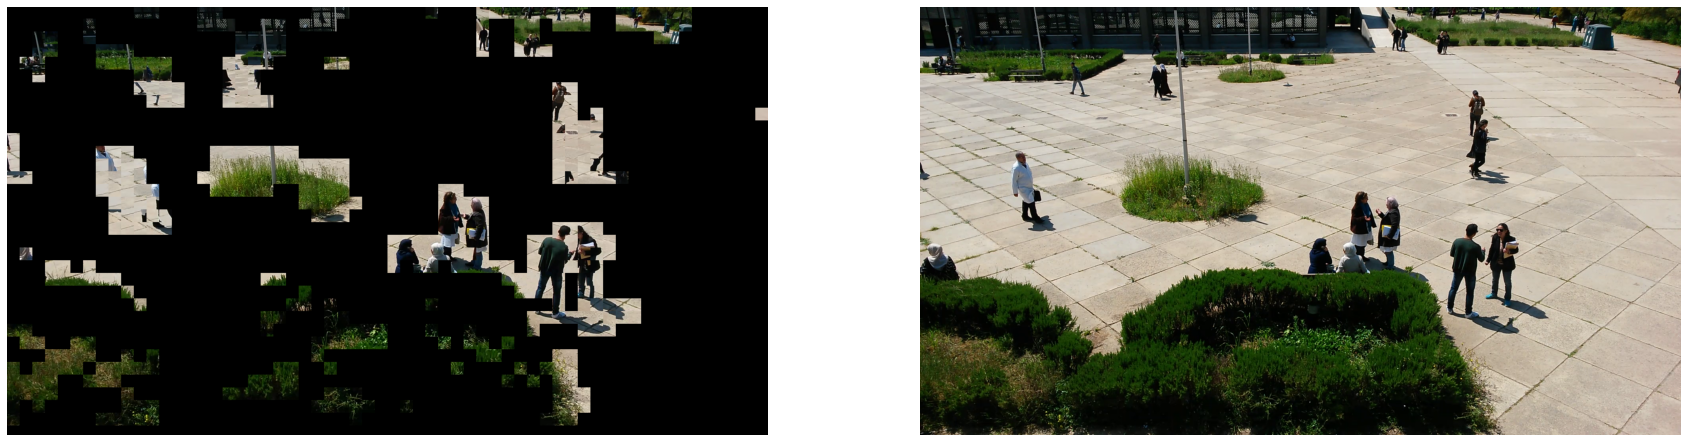

In [4]:
limitX = width - (width % bloc_height)
limitY = height- (height % bloc_height)

for y in range (0,limitY,bloc_height):
    for x in range(0,limitX,bloc_width):
        print((y/limitY)*100,"%")
        topLeftX = x
        topLeftY = y
        bottomRightX = x+bloc_width
        bottomRightY = y+bloc_height
        bloc1 = Yimg1[topLeftY:bottomRightY,topLeftX:bottomRightX]
        bloc2 = Yimg2[topLeftY:bottomRightY,topLeftX:bottomRightX]
        if seuil < MSE(bloc1,bloc2):
            coordinates = [(topLeftX,topLeftY),(bottomRightX,bottomRightY)]
            #draw_redBox(img1,coordinates)
            searchBox = get_searchBox(coordinates,width,height,span)
            greenBox = search(bloc1,searchBox,Yimg2,bloc_width,bloc_height)
            #greenBox = binarySearch(bloc1,searchBox,Yimg2,bloc_width,bloc_height,width,height,span//2)
            #draw_greenBox(img2,greenBox)
            img[topLeftY:bottomRightY,topLeftX:bottomRightX] = img1[greenBox[0][1]:greenBox[1][1],greenBox[0][0]:greenBox[1][0]]


rows = 1
columns = 2

fig = plt.figure(figsize = (30,25))

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
